#  Anomalous activities by small and mid-size enterprises

Small and Mid-size Enterprises (SME).

For the SMEs operating in the same industry segment:
 * Total asset and operating profits are expected to be correlated.
 * If a firm generated too much profit with a limited amount of assets, there may be some illegal activities contributing to the profits
 * If a firm generated too little profit with an abundant amount of assets, the operating profits may be disguised for tax purposes

 ## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Question 1**: import *k*-means and isolation forest learners from sklearn.

In [2]:
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest

## Load data

**Question 2**: load `week06_tutorial_data.csv` and print the first 5 rows.

In [6]:
df = pd.read_csv('/Users/mikeredshaw/Documents/Schulich MBAN/AI in Business/week06_tutorial_data.csv')
df.head()

,Total Assets,Operating Profits
0,1686.275119,1070.262036
1,8208.664875,1118.977096
2,11041.828780,961.875285
3,-3613.136390,9042.081321
4,760.941151,479.629689


**Question 3**: Store the values in a numpy array called `X`.

In [9]:
X = df.values


**Question 4**: How many points/datum and features are there in `X`?

In [11]:
X.shape

(140, 2)

## Model

### Isolation forest

**Question 5**: Instantiate an isolation forest with 10,000 estimators. Call it `iso_model`.

In [52]:
iso_model = IsolationForest(n_estimators=10000, contamination=0.1)

**Question 6**: What is an *estimator*?

*Answer: ...*

**Question 7**: Fit the model.

In [53]:
iso_model.fit(X)

IsolationForest(contamination=0.1, n_estimators=10000)

**Question 8**: Predict anomalies.

In [54]:
isomodel_pred = iso_model.predict(X)

**Question 9**: How do we recognize the anomalies (and the non-anomalies)?

In [55]:
print(isomodel_pred)


[ 1  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1 -1  1  1  1  1
  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1
  1  1  1  1 -1  1 -1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1  1  1  1  1 -1  1 -1  1  1  1  1  1  1  1  1]


In [56]:
iso_anomalies = X[isomodel_pred == -1]
print(iso_anomalies)

[[-3613.13639     9042.081321  ]
 [21080.5679        73.89734466]
 [ 1552.038858      25.11739487]
 [13998.23389     1979.122167  ]
 [17456.5836      1852.249609  ]
 [17352.06676     1850.816676  ]
 [-1749.92279     7029.013569  ]
 [18318.75342     1639.062971  ]
 [20295.34954       83.69841288]
 [-3366.153133    -105.5456532 ]
 [22565.88102       83.64983378]
 [-2573.395943     -57.56049155]
 [ -948.8869561    -31.8414615 ]
 [21927.03203       48.6362547 ]]


**Question 10**: Remember slide 11: *Classify: classify points above a set threshold as anomalies*?

**Question 11**: Did we set a threshold. If not, how is it set?

*Answer: ...*



### *K*-means

**Question 12**: Instantiate and fit *k*-means model. Call it `kmeans_model`.

**Question 13**: What should *k* be?

*Answer: ...*

In [46]:
kmeans_model = KMeans(n_clusters=2)
kmeans_model.fit(X)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

**Question 14**: How can we use the fitted model for anomaly detection?

In [47]:
kmeans_model_pred = kmeans_model.predict(X)

In [48]:
print(kmeans_model_pred)

[1 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 0 0 1 1 1
 0 1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1
 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0
 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1]


In [49]:
kmeans_anomalies = X[kmeans_model_pred == 1]
print(kmeans_anomalies)

[[ 1686.275119    1070.262036  ]
 [ 8208.664875    1118.977096  ]
 [-3613.13639     9042.081321  ]
 [  760.9411505    479.6296886 ]
 [ 6862.047745    1160.000951  ]
 [ 8679.560199     943.3664238 ]
 [ 1629.221225     657.8101431 ]
 [ 7370.363869    1184.479724  ]
 [ 5552.496064     989.1911665 ]
 [   99.93505271   880.6696226 ]
 [ 6898.118472     660.2213169 ]
 [ 3684.865584     780.1479929 ]
 [ 1143.225838     541.8916932 ]
 [ -624.7830939    311.2412554 ]
 [ 8700.678851    1549.110787  ]
 [ -678.1815671    701.8788145 ]
 [ 8335.153721     888.3600247 ]
 [ 1699.614425     821.1117859 ]
 [ 5459.372701     999.7461888 ]
 [ 1701.65246      228.8418423 ]
 [ 3625.954641     495.3603891 ]
 [ 8138.322108    1393.946171  ]
 [ 4824.944981    1308.884502  ]
 [  871.5685363    914.0628027 ]
 [ 5996.646913     833.2276683 ]
 [ 7570.78559     1186.144247  ]
 [ 4999.66802      967.6561026 ]
 [ 5686.102295     931.2006877 ]
 [ 1446.939417     621.2296522 ]
 [ 8187.163435     957.9276134 ]
 [ 6681.36

**Question 15**: Do we need to set a threshold? If yes, then how?

*Answer: ...*

## Plot

### Isolation forest

Text(0, 0.5, 'Operating Profits')

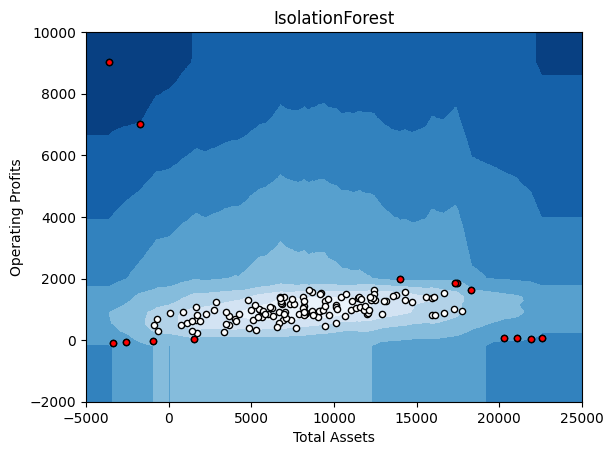

In [57]:
# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5000, 25000, 500), np.linspace(-2000, 10000, 100))
Z = iso_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

plt.scatter(X[:, 0], X[:, 1], c='white', s=20, edgecolor='k')
plt.scatter(iso_anomalies[:, 0], iso_anomalies[:, 1], c='red', ec='k', s=20)
plt.axis('tight')
plt.xlim((-5000, 25000))
plt.ylim((-2000, 10000))
plt.xlabel('Total Assets')
plt.ylabel('Operating Profits')

## *K*-means

Text(0.5, 1.0, 'K-means')

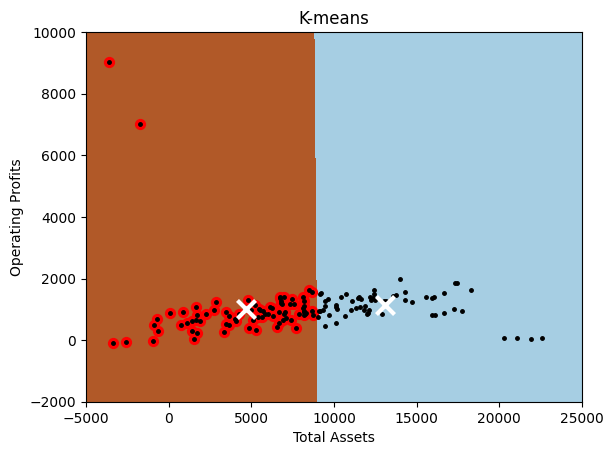

In [51]:
xx, yy = np.meshgrid(np.linspace(-5000, 25000, 500), np.linspace(-2000, 10000, 100))
Z = kmeans_model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest", extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

centroids = kmeans_model.cluster_centers_

plt.plot(X[:, 0], X[:, 1], "k.", markersize=5)
plt.scatter(kmeans_anomalies[:, 0], kmeans_anomalies[:, 1], marker='o', c='red', ec='r', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3, color="w", zorder=10)
plt.xlabel('Total Assets')
plt.ylabel('Operating Profits')
plt.title("K-means")